# Import Library

In [2]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt

from transformers import T5Tokenizer

import warnings
warnings.filterwarnings('ignore')

# 1. Business Understanding

### 1.1 Permasalahan dan Solusi
- **Masalah yang ingin diselesaikan**: Dalam dunia digital yang penuh dengan informasi, pembaca sering kali kesulitan untuk memproses berita panjang secara efisien.
- **Solusi yang diberikan**: Menggunakan model _transformer **T5**_ (Text-to-Text Transfer Transformer) untuk menghasilkan ringkasan artikel berita secara otomatis. Model ini akan melibatkan teknik pemrosesan bahasa alami / _natural language processing_ (NLP) yang dapat memahami konteks dan menghasilkan ringkasan yang akurat dan padat dari artikel berita yang panjang.

### 1.2. Goals
- **Meningkatkan pengalaman pengguna**: Dengan memberikan ringkasan yang jelas dan padat, pengguna akan lebih cepat mendapatkan informasi yang mereka butuhkan. Ini akan meningkatkan kepuasan pembaca dan engagement mereka dengan konten.
- **Otomatisasi Proses**: Mengurangi beban kerja editorial yang biasanya harus menyarikan artikel panjang secara manual. Sistem otomatis ini memungkinkan pengelolaan konten yang lebih efisien.

# 2. Data Understanding

### 2.1 Sumber Data
- Data diambil dari **Kompas.com**. Struktur data yang diambil mencakup judul berita, tanggal, kategori, isi berita, ringkasan dan url berita.

### 2.2 Metode Pengumpulan Data
- Untuk pengumpulan data berita pada proyek ini, saya menggunakan metode **web crawling** dan **web scraping** secara mandiri dengan memanfaatkan dua pustaka Python yaitu **Requests** dan **BeautifulSoup**. Proses ini dimulai dengan **mengirimkan permintaan HTTP** menggunakan pustaka Requests untuk mengakses halaman-halaman berita dari Kompas.com. Setelah itu, data HTML yang diperoleh diproses menggunakan BeautifulSoup untuk **mengekstrak informasi-informasi** seperti judul, tanggal publikasi, kategori, isi berita, ringkasan, dan url. Dengan metode ini, artikel dapat diakses secara langsung dari situs tersebut dan membangun dataset yang diperlukan untuk proses ringkasan menggunakan model abstractive.

### 2.3 Deskripsi Dataset
- **Jumlah Data**: 2262 artikel berita.
- **Format Data**: CSV, dengan 6 kolom sebagai berikut:
  - `judul`: Judul berita.
  - `tanggal`: Tanggal publikasi.
  - `kategori`: Kategori berita.
  - `isi_berita`: Isi artikel berita.
  - `ringkasan`: Ringkasan artikel berita.
  - `url`: Url artikel berita.

In [20]:
PATH = 'D:/SEMESTER 7 (2024)/PPW/TUGAS AKHIR PPW'
path_data = os.path.join(PATH, 'Data', 'kompas.csv')
data = pd.read_csv(path_data)

In [21]:
data.shape

(2262, 6)

In [22]:
data.columns

Index(['judul', 'tanggal', 'kategori', 'isi_berita', 'ringkasan', 'url'], dtype='object')

### 2.4 Preview Dataset

In [23]:
data.sample(5)

,judul,tanggal,kategori,isi_berita,ringkasan,url
1993,Sebelum Syuting Film Cinta Tak Seindah Drama K...,2024-11-21 17:53:15,Hype,"JAKARTA, KOMPAS.com - Aktor Jerome Kurnia meng...",Setelah menyaksikan referensi-referensi terseb...,https://www.kompas.com/hype/read/2024/11/21/17...
2029,BMKG Deteksi Siklon Tropis 96S yang Mendekati ...,2024-11-21 17:15:00,Tren,"KOMPAS.com - Badan Meteorologi, Klimatologi, d...",BMKG mendeteksi Bibit Siklon Tropis 96S mendek...,https://www.kompas.com/tren/read/2024/11/21/17...
545,Polda Bengkulu Tangkap 4 Pelaku Perdagangan Or...,2024-11-23 13:23:38,Regional,"BENGKULU, KOMPAS.com - Penyidik Subdit Renakta...",Polda Bengkulu berhasil menangkap empat pelaku...,https://regional.kompas.com/read/2024/11/23/13...
935,"Racun Sangga Berdasarkan Kisah Nyata, Frederik...",2024-11-22 19:38:01,Hype,"JAKARTA, KOMPAS.com - Pemeran film Racun Sangg...",Cerita film Racun Sangga: Santet Pemisah Rumah...,https://www.kompas.com/hype/read/2024/11/22/19...
873,Kimia Farma Dukung Ketahanan Kesehatan lewat I...,2024-11-22 20:54:00,Money,"JAKARTA, KOMPAS.com - PT Kimia Farma Tbk (KAEF...",PT Kimia Farma Tbk (KAEF) mendukung ketahanan ...,https://money.kompas.com/read/2024/11/22/20540...


### 2.5 Kualitas Data

- **Missing Value**

In [24]:
data.isnull().sum()

judul         0
tanggal       0
kategori      0
isi_berita    0
ringkasan     0
url           0
dtype: int64

Dataset yang digunakan **tidak ditemukan** missing value.

- **Data Duplikasi** 

In [25]:
data.duplicated().sum()

27

Dataset yang digunakan **ditemukan 27 baris** duplikasi artikel. Dan artikel yang terduplikasi adalah sebagai berikut.

In [26]:
data[data.duplicated(keep=False)]

,judul,tanggal,kategori,isi_berita,ringkasan,url
149,"Resep Pepes Tahu Ikan Pedas, Ide Lauk Sehat Ta...",2024-11-24 10:10:00,Food,KOMPAS.com - Pepes tahu ikan pedas termasuk pi...,"Tidak hanya enak, sajian pepes tahu ikan pedas...",https://www.kompas.com/food/read/2024/11/24/10...
150,"Resep Pepes Tahu Ikan Pedas, Ide Lauk Sehat Ta...",2024-11-24 10:10:00,Food,KOMPAS.com - Pepes tahu ikan pedas termasuk pi...,"Tidak hanya enak, sajian pepes tahu ikan pedas...",https://www.kompas.com/food/read/2024/11/24/10...
299,"Leicester vs Chelsea 1-2: Menang, The Blues Te...",2024-11-23 21:40:18,Bola,KOMPAS.com - Chelsea berhasil memenangkan laga...,Chelsea berhasil memenangkan laga saat menjadi...,https://bola.kompas.com/read/2024/11/23/214018...
300,"Leicester vs Chelsea 1-2: Menang, The Blues Te...",2024-11-23 21:40:18,Bola,KOMPAS.com - Chelsea berhasil memenangkan laga...,Chelsea berhasil memenangkan laga saat menjadi...,https://bola.kompas.com/read/2024/11/23/214018...
329,Yura Yunita Gelar Konser Bingah Yura di Istora...,2024-11-23 20:42:01,Hype,"JAKARTA, KOMPAS.com - Penyanyi Yura Yunita aka...",Yura Yunita terakhir menggelar konser tunggal ...,https://www.kompas.com/hype/read/2024/11/23/20...
330,Yura Yunita Gelar Konser Bingah Yura di Istora...,2024-11-23 20:42:01,Hype,"JAKARTA, KOMPAS.com - Penyanyi Yura Yunita aka...",Yura Yunita terakhir menggelar konser tunggal ...,https://www.kompas.com/hype/read/2024/11/23/20...
343,Upaya BNI Dorong Transisi Energi di Indonesia,2024-11-23 20:04:05,Money,"JAKARTA, KOMPAS.com – PT Bank Negara Indonesia...",BNI terus mendorong memperkuat tata kelola per...,https://money.kompas.com/read/2024/11/23/20040...
344,Cabup Kebumen Arif Sugiyanto Bagi-bagi 3.000 M...,2024-11-23 20:01:17,Regional,"KEBUMEN, KOMPAS.com - Calon Bupati Kebumen nom...",Arif Sugiyanto siapkan 3.000 sepeda motor untu...,https://regional.kompas.com/read/2024/11/23/20...
345,Upaya BNI Dorong Transisi Energi di Indonesia,2024-11-23 20:04:05,Money,"JAKARTA, KOMPAS.com – PT Bank Negara Indonesia...",BNI terus mendorong memperkuat tata kelola per...,https://money.kompas.com/read/2024/11/23/20040...
346,Cabup Kebumen Arif Sugiyanto Bagi-bagi 3.000 M...,2024-11-23 20:01:17,Regional,"KEBUMEN, KOMPAS.com - Calon Bupati Kebumen nom...",Arif Sugiyanto siapkan 3.000 sepeda motor untu...,https://regional.kompas.com/read/2024/11/23/20...


- **Distribusi Kategori Berita**

In [27]:
distribusi_kategori = data['kategori'].value_counts()
print(distribusi_kategori)

News           521
Regional       490
Money          190
Otomotif       156
Bola           129
Hype           121
Tren           120
Global          73
Lifestyle       58
Tekno           52
Edukasi         52
Food            48
Travel          47
Properti        44
Health          35
Lestari         29
Advertorial     25
Cek fakta       20
Skola           19
Homey           18
Ikn              8
Umkm             5
Sains            1
Stori            1
Name: kategori, dtype: int64


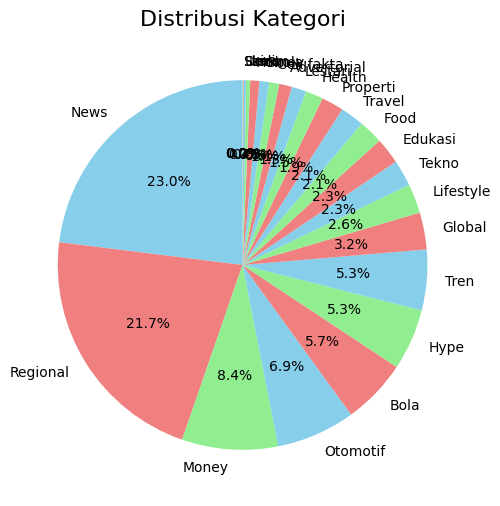

In [28]:
plt.figure(figsize=(8, 6))
distribusi_kategori.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribusi Kategori', fontsize=16)
plt.ylabel('')
plt.show()

Kategori berita didominasi oleh berita dengan kategori **News** (23%) dan **Regional** (21.7%). <br>
> -  **News** merupakan **berita terkini** atau **berita terbaru** yang berfokus pada kejadian-kejadian yang sedang terjadi di dunia atau di lingkungan sekitar. <br>
> - **Regional** merupakan berita yang bersifat **lokal** atau spesifik pada suatu wilayah geografi tertentu.

- **Panjang kata per-artikel**

In [29]:
data['word_count'] = data['isi_berita'].apply(lambda x: len(x.split()))
short_articles = data[data['word_count'] < 50]
if short_articles.empty:
    print('Tidak ada artikel berita yang kurang dari 50 kata.')
else:
    print(short_articles[['isi_berita', 'ringkasan', 'word_count']])    

Tidak ada artikel berita yang kurang dari 50 kata.


Artikel dengan panjang kurang dari 50 kata **sulit diringkas** untuk mencari maknanya. Namun pada dataset di atas **tidak memiliki** artikel dengan isi berita yang kurang dari 50 kata

# 3. Data Preparation

### 3.1 Data Cleaning

In [30]:
data

,judul,tanggal,kategori,isi_berita,ringkasan,url,word_count
0,"Ibu Dua Anak di Gresik Tewas Dianiaya Suami, S...",2024-11-24 15:59:36,Regional,KOMPAS.com - Pertengkaran suami istri di Gresi...,Pertengkaran suami istri berujung tragis di Gr...,https://surabaya.kompas.com/read/2024/11/24/15...,332
1,KPU Sikka Mulai Distribusikan Logistik Pilkada...,2024-11-24 15:59:17,Regional,"SIKKA, KOMPAS.com – Komisi Pemilihan Umum (KPU...",KPU Sikka mulai mendistribusikan logistik pilk...,https://regional.kompas.com/read/2024/11/24/15...,200
2,"Pawai Iklim di Semarang, Suara Anak Muda untuk...",2024-11-24 15:57:40,Regional,"SEMARANG, KOMPAS.com - Ratusan anak muda menge...",Ratusan anak muda mengenakan baju putih berkum...,https://regional.kompas.com/read/2024/11/24/15...,328
3,Biomassa Jadi Faktor Penting Pengurangan Emisi...,2024-11-24 15:54:41,Money,"JAKARTA, KOMPAS.com – Pemanfaatan biomassa seb...","Menurut PLN, salah satu contoh keberhasilan pe...",https://money.kompas.com/read/2024/11/24/15544...,419
4,Prabowo dan Presiden MBZ Saksikan Pertukaran M...,2024-11-24 15:52:12,News,"JAKARTA, KOMPAS.com - Indonesia dan Uni Emirat...",Indoneisa dan UEA sepakat menandatangani kerja...,https://nasional.kompas.com/read/2024/11/24/15...,300
...,...,...,...,...,...,...,...
2257,"PPN Mau Naik Jadi 12 Persen, Bagaimana Nasib P...",2024-11-21 13:07:08,Otomotif,"JAKARTA, KOMPAS.com – Penjualan mobil di pasar...",Kenaikan PPN bakal langsung berdampak pada men...,https://otomotif.kompas.com/read/2024/11/21/13...,322
2258,"YouTube Gaming Recap 2024 Dirilis, Kilas Balik...",2024-11-21 13:07:00,Tekno,KOMPAS.com - YouTube setiap tahun merilis fitu...,YouTube merilis Gaming Recap 2024. Fitur ini m...,https://tekno.kompas.com/read/2024/11/21/13070...,384
2259,Kisah Satu Keluarga di Jepara Bangun Jembatan ...,2024-11-21 13:06:41,Regional,"JEPARA, KOMPAS.com - Keluarga Sunardi (70), pe...",Joko pun menyebukan sudah berkoordinasi dengan...,https://regional.kompas.com/read/2024/11/21/13...,408
2260,Wapres Tinjau Makan Bergizi Gratis di SMKN 3 T...,2024-11-21 13:06:29,News,"JAKARTA, KOMPAS.com - Wakil Presiden (Wapres) ...",Gibran Rakabuming Raka meninjau pelaksanaan uj...,https://nasional.kompas.com/read/2024/11/21/13...,274


### 3.2 Feature Engineering

### 3.3 Text Tokenization

### 3.4 Data Splitting

### 3.5 Formatting Input-Output for the Model

### 3.6 Saving and Loading Data